In [29]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

RANDOM_SEED = 42

In [30]:
model_version = "4b"
print("Model:\t" + model_version)

Model:	4b


In [31]:
model_save_path = "model\\customModel\\modelB\\ASLclassifier" + model_version + ".hdf5"
tflite_save_path = "model\\customModel\\modelB\\ASLclassifier" + model_version + ".tflite"

evaluation_folder = "evaluation\\ASL\\"
confmat_path = evaluation_folder + "confusionMatrix" + model_version + ".png"
classrep_path = evaluation_folder + "classificationReport" + model_version + ".csv"
architecture_path = evaluation_folder + "architecture" + model_version + ".png"
traingraph_path = evaluation_folder + "trainingHistory" + model_version + ".png"

In [32]:
NUM_CLASSES = 28

In [33]:
match model_version:
    case "4a" | "4b":
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((61, )),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(80, activation='relu'),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])
        col_lst = [1] + list(range(4, 64))
        if model_version == "4a":
            csv_file = "keypoints\\keypointB_3D_full.csv"
        else:
            csv_file = "keypoints\\keypointB_3D_augmented.csv"
        
    case "5a":
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((14, )),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(22, activation='relu'),
            tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])
        col_lst = list([1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18])
        csv_file = "keypoints\\keypointB_angles_3D.csv"
        
    case "5b":
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((19, )),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(24, activation='relu'),
            tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])
        col_lst = list(range(1, 20))
        csv_file = "keypoints\\keypointB_angles_3D.csv"
        
    case "6a":
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((7, )),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(22, activation='relu'),
            tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])
        col_lst = list([1, 2, 4, 6, 8, 10, 12])
        csv_file = "keypoints\\keypointB_angles_2D.csv"
        
    case "6b":
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((13, )),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(21, activation='relu'),
            tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
        ])
        col_lst = list(range(1, 14))
        csv_file = "keypoints\\keypointB_angles_2D.csv"
        
    case _:
        model, col_lst, csv_file = [], [], []
        raise ValueError(f"Invalid model version {model_version}")

In [34]:
X_dataset = np.loadtxt(csv_file, delimiter=',', dtype='float32', usecols=col_lst)

In [35]:
y_dataset = np.loadtxt(csv_file, delimiter=',', dtype='<U8', usecols=0)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target data to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 61)                0         
                                                                 
 dense_2 (Dense)             (None, 80)                4960      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dense_4 (Dense)             (None, 28)                1428      
                                                                 
Total params: 10,438
Trainable params: 10,438
Non-trainable params: 0
_________________________________________________________________


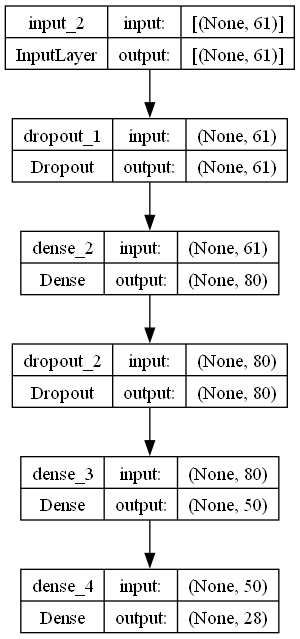

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
# cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [41]:
lr_schedule = LearningRateScheduler(lambda epoch: 0.0001 + 0.001 ** (1 + epoch/50))

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    # , 'Precision', 'Recall'
)

In [43]:
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=75,
    batch_size=128,
    validation_data=(X_test, y_test_encoded),
    # callbacks=[es_callback]    # callbacks=[cp_callback, es_callback]
    callbacks=[lr_schedule]
)

Epoch 1/75
694/694 [==============================] - 3s 3ms/step - loss: 1.5569 - accuracy: 0.5059 - val_loss: 0.5648 - val_accuracy: 0.8729 - lr: 0.0011
Epoch 2/75
694/694 [==============================] - 2s 2ms/step - loss: 0.8659 - accuracy: 0.7092 - val_loss: 0.4330 - val_accuracy: 0.9103 - lr: 9.7096e-04
Epoch 3/75
694/694 [==============================] - 2s 2ms/step - loss: 0.7234 - accuracy: 0.7559 - val_loss: 0.3772 - val_accuracy: 0.9090 - lr: 8.5858e-04
Epoch 4/75
694/694 [==============================] - 2s 2ms/step - loss: 0.6387 - accuracy: 0.7883 - val_loss: 0.3471 - val_accuracy: 0.9233 - lr: 7.6069e-04
Epoch 5/75
694/694 [==============================] - 2s 2ms/step - loss: 0.5679 - accuracy: 0.8159 - val_loss: 0.3190 - val_accuracy: 0.9194 - lr: 6.7544e-04
Epoch 6/75
694/694 [==============================] - 2s 2ms/step - loss: 0.5134 - accuracy: 0.8375 - val_loss: 0.2893 - val_accuracy: 0.9331 - lr: 6.0119e-04
Epoch 7/75
694/694 [==============================

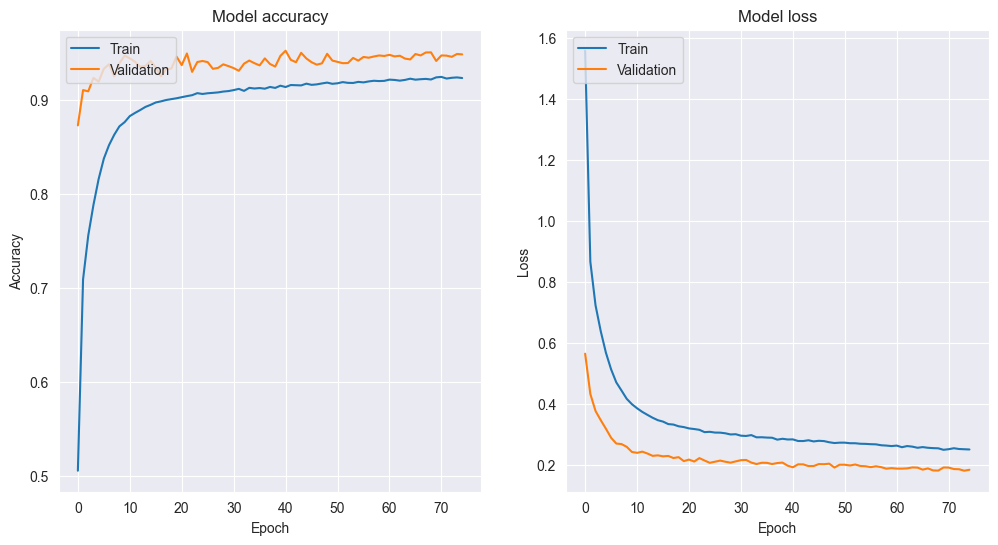

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

if 1:
    plt.savefig(traingraph_path)

plt.show()

In [45]:
val_loss, val_acc = model.evaluate(X_test, y_test_encoded, batch_size=128)

174/174 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9483


In [46]:
# model = tf.keras.models.load_model(model_save_path)

In [47]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 53ms/step
[2.0501092e-13 2.8831727e-12 1.9308700e-06 3.0113631e-07 1.3256864e-13
 9.4019341e-12 8.4798658e-06 1.8487308e-03 3.1216363e-08 2.0571613e-06
 1.0785475e-15 5.4873484e-10 5.3107985e-09 7.4601751e-08 1.5985367e-10
 9.7482896e-01 2.0538958e-02 3.0667753e-08 4.5857534e-13 6.5914371e-11
 1.0851509e-07 1.8247289e-11 7.1330532e-11 6.8399991e-14 2.5797517e-15
 8.0070087e-05 2.6891781e-03 1.0893342e-06]
15


694/694 [==============================] - 1s 845us/step


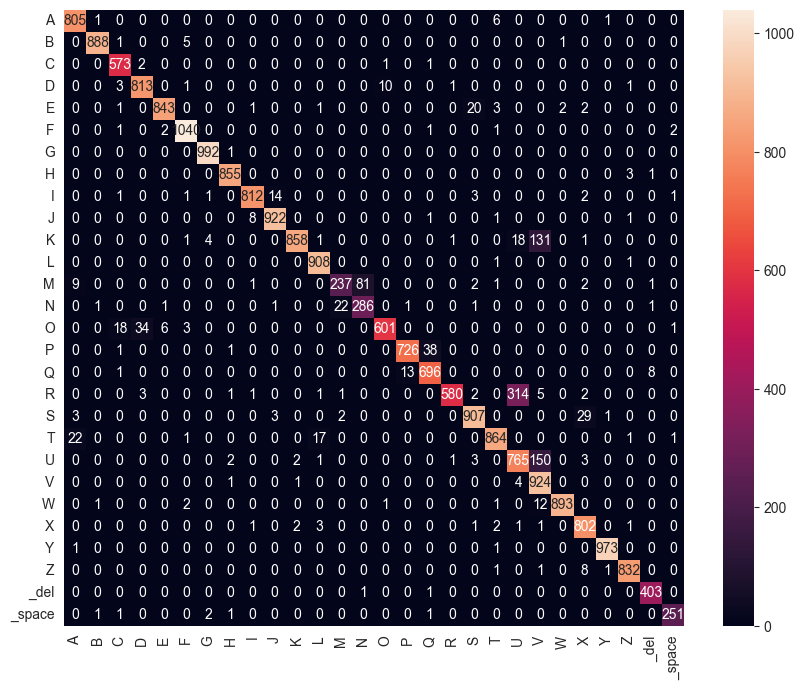

Classification Report
              precision    recall  f1-score   support

           A       0.96      0.99      0.97       813
           B       1.00      0.99      0.99       895
           C       0.95      0.99      0.97       577
           D       0.95      0.98      0.97       829
           E       0.99      0.97      0.98       873
           F       0.99      0.99      0.99      1047
           G       0.99      1.00      1.00       993
           H       0.99      1.00      0.99       859
           I       0.99      0.97      0.98       835
           J       0.98      0.99      0.98       933
           K       0.99      0.85      0.91      1015
           L       0.97      1.00      0.99       910
           M       0.90      0.71      0.80       334
           N       0.78      0.91      0.84       314
           O       0.98      0.91      0.94       663
           P       0.98      0.95      0.96       766
           Q       0.94      0.97      0.96       718
     

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(10, 8))  # (7, 6)
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig(confmat_path)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

label_encoder.fit(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)


print_confusion_matrix(y_test_decoded, y_pred_decoded)
classrep_dict = classification_report(y_test_decoded, y_pred_decoded, output_dict=True)

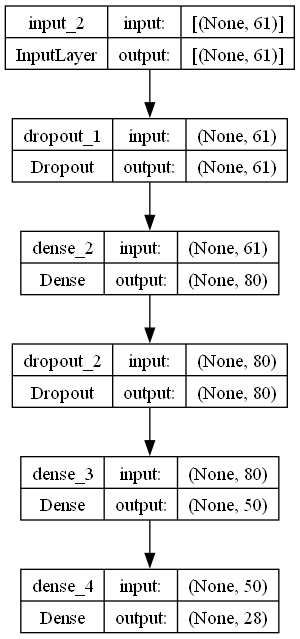

In [49]:
with open(classrep_path, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the headers
    writer.writerow(["Class", "Precision", "Recall", "F1-Score", "Support"])
    
    # Write the rows
    for key, value in classrep_dict.items():
        if isinstance(value, dict):
            writer.writerow([key, value['precision'], value['recall'], value['f1-score'], value['support']])
        else:
            writer.writerow([key, value])
        
plot_model(model, to_file=architecture_path, show_shapes=True, show_layer_names=True)

# Tensorflow-Lite

In [50]:
model.save(model_save_path, include_optimizer=False)

In [51]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ivono\AppData\Local\Temp\tmph7f7qkkc\assets


INFO:tensorflow:Assets written to: C:\Users\ivono\AppData\Local\Temp\tmph7f7qkkc\assets


13208

In [52]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [53]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [54]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [55]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 8 ms


In [56]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3744730e-13 3.1132562e-12 1.7933240e-06 3.2296350e-07 1.2329840e-13
 8.5629863e-12 1.0489421e-05 2.1911685e-03 4.1667686e-08 1.9544884e-06
 1.5163575e-15 4.9309135e-10 5.8175020e-09 6.0638151e-08 1.9627516e-10
 9.7042996e-01 2.4712376e-02 4.3592468e-08 5.4181757e-13 6.6921559e-11
 1.3812166e-07 3.3021835e-11 8.8646347e-11 1.1687359e-13 2.6023906e-15
 8.2108432e-05 2.5683811e-03 1.0931572e-06]
15
